<a href="https://colab.research.google.com/github/ParamasivamJ/Electric-Vehicle-Market-Analysis-Geographical-Behavioral-Insights/blob/main/EV_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="background-color:#DBEDF3; padding:20px; font-size:15px">

**🗺️Objective:**
    

This notebook aims to provide a comprehensive analysis of market segmentation within the Electric Vehicle (EV) market in India. By examining the diverse needs, preferences, and behaviors of consumers, the report seeks to uncover actionable insights that can inform strategic decision-making for stakeholders across the EV ecosystem. Through a detailed exploration of market segmentation dynamics, the objective is to facilitate a deeper understanding of the EV market landscape in India, identify key market segments, and uncover opportunities for targeted interventions and initiatives to drive sustainable growth and adoption of electric vehicles.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, davies_bouldin_score
from collections import Counter


print("Libraries imported successfully.")

Libraries imported successfully.


<a id="1"></a>
# <p style="padding:15px;background-color:#90EE90;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:500"> Exploring the Influence of Demographic Factors on Electric Car Purchasing Behavior in India</p>

In [6]:
Data=pd.read_csv("/content/drive/MyDrive/EV_INDIA_DATA/behavioural_dataset.csv")

In [7]:
# Preview the dataset
df = pd.DataFrame(Data)
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [8]:
# View dimensions of dataset
rows, col = df.shape
print ("Dimensions of dataset: {}" . format (df.shape))
print ('Rows:', rows, '\nColumns:', col)

Dimensions of dataset: (99, 8)
Rows: 99 
Columns: 8


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   Total Salary      99 non-null     int64 
 7   Price             99 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 6.3+ KB


In [10]:
df.columns

Index(['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'Total Salary', 'Price'],
      dtype='object')

In [11]:
df.isna().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
Total Salary        0
Price               0
dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,99.0,3.631313e+01,6.246054e+00,26.0,31.0,36.0,41.0,51.0
No of Dependents,99.0,2.181818e+00,1.335265e+00,0.0,2.0,2.0,3.0,4.0
Total Salary,99.0,2.270707e+06,1.050777e+06,200000.0,1550000.0,2100000.0,2700000.0,5200000.0
Price,99.0,1.194040e+06,4.376955e+05,110000.0,800000.0,1200000.0,1500000.0,3000000.0


In [13]:
df.describe(include="object")

,Profession,Marrital Status,Education,Personal loan
count,99,99,99,99
unique,2,2,2,2
top,Salaried,Married,Post Graduate,No
freq,64,84,56,67


In [14]:
for column in ['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'Total Salary', 'Price']:
  print(column,':',df[column].unique())
  print(80*"_")

Age : [27 35 45 41 31 28 33 34 29 30 49 26 37 36 43 42 32 44 39 46 50 51]
________________________________________________________________________________
Profession : ['Salaried' 'Business']
________________________________________________________________________________
Marrital Status : ['Single' 'Married']
________________________________________________________________________________
Education : ['Post Graduate' 'Graduate']
________________________________________________________________________________
No of Dependents : [0 2 4 3]
________________________________________________________________________________
Personal loan : ['Yes' 'No']
________________________________________________________________________________
Total Salary : [ 800000 2000000 1800000 2200000 2600000  900000 1400000 1900000 1700000
 1300000 4500000 2500000 2400000 2900000 1600000 2700000 1100000 2100000
 3000000 3700000 2300000 3600000  200000 3100000 4300000 3800000 4700000
 1200000 1500000 4000000 320000

In [15]:
variables = ['Age', 'Profession', 'Marrital Status', 'Education', 'No of Dependents',
       'Personal loan', 'Total Salary', 'Price']

# Iterate over each column and print the counts
for column in variables:
    print(column, ":", df[column].value_counts())
    print(60*"=")


Age : Age
36    13
35    10
31     8
41     7
34     7
27     6
37     6
42     5
30     5
39     4
44     4
29     4
51     3
49     3
28     3
43     2
33     2
32     2
45     2
46     1
50     1
26     1
Name: count, dtype: int64
Profession : Profession
Salaried    64
Business    35
Name: count, dtype: int64
Marrital Status : Marrital Status
Married    84
Single     15
Name: count, dtype: int64
Education : Education
Post Graduate    56
Graduate         43
Name: count, dtype: int64
No of Dependents : No of Dependents
3    34
2    29
0    22
4    14
Name: count, dtype: int64
Personal loan : Personal loan
No     67
Yes    32
Name: count, dtype: int64
Total Salary : Total Salary
1400000    8
2000000    7
2200000    6
1900000    5
2100000    5
1600000    5
1800000    4
2600000    4
900000     4
1300000    4
2400000    4
2700000    4
800000     3
1100000    3
3100000    3
3600000    3
2900000    3
1700000    3
2500000    2
4500000    2
4000000    2
1500000    1
2800000    1
4900000    1


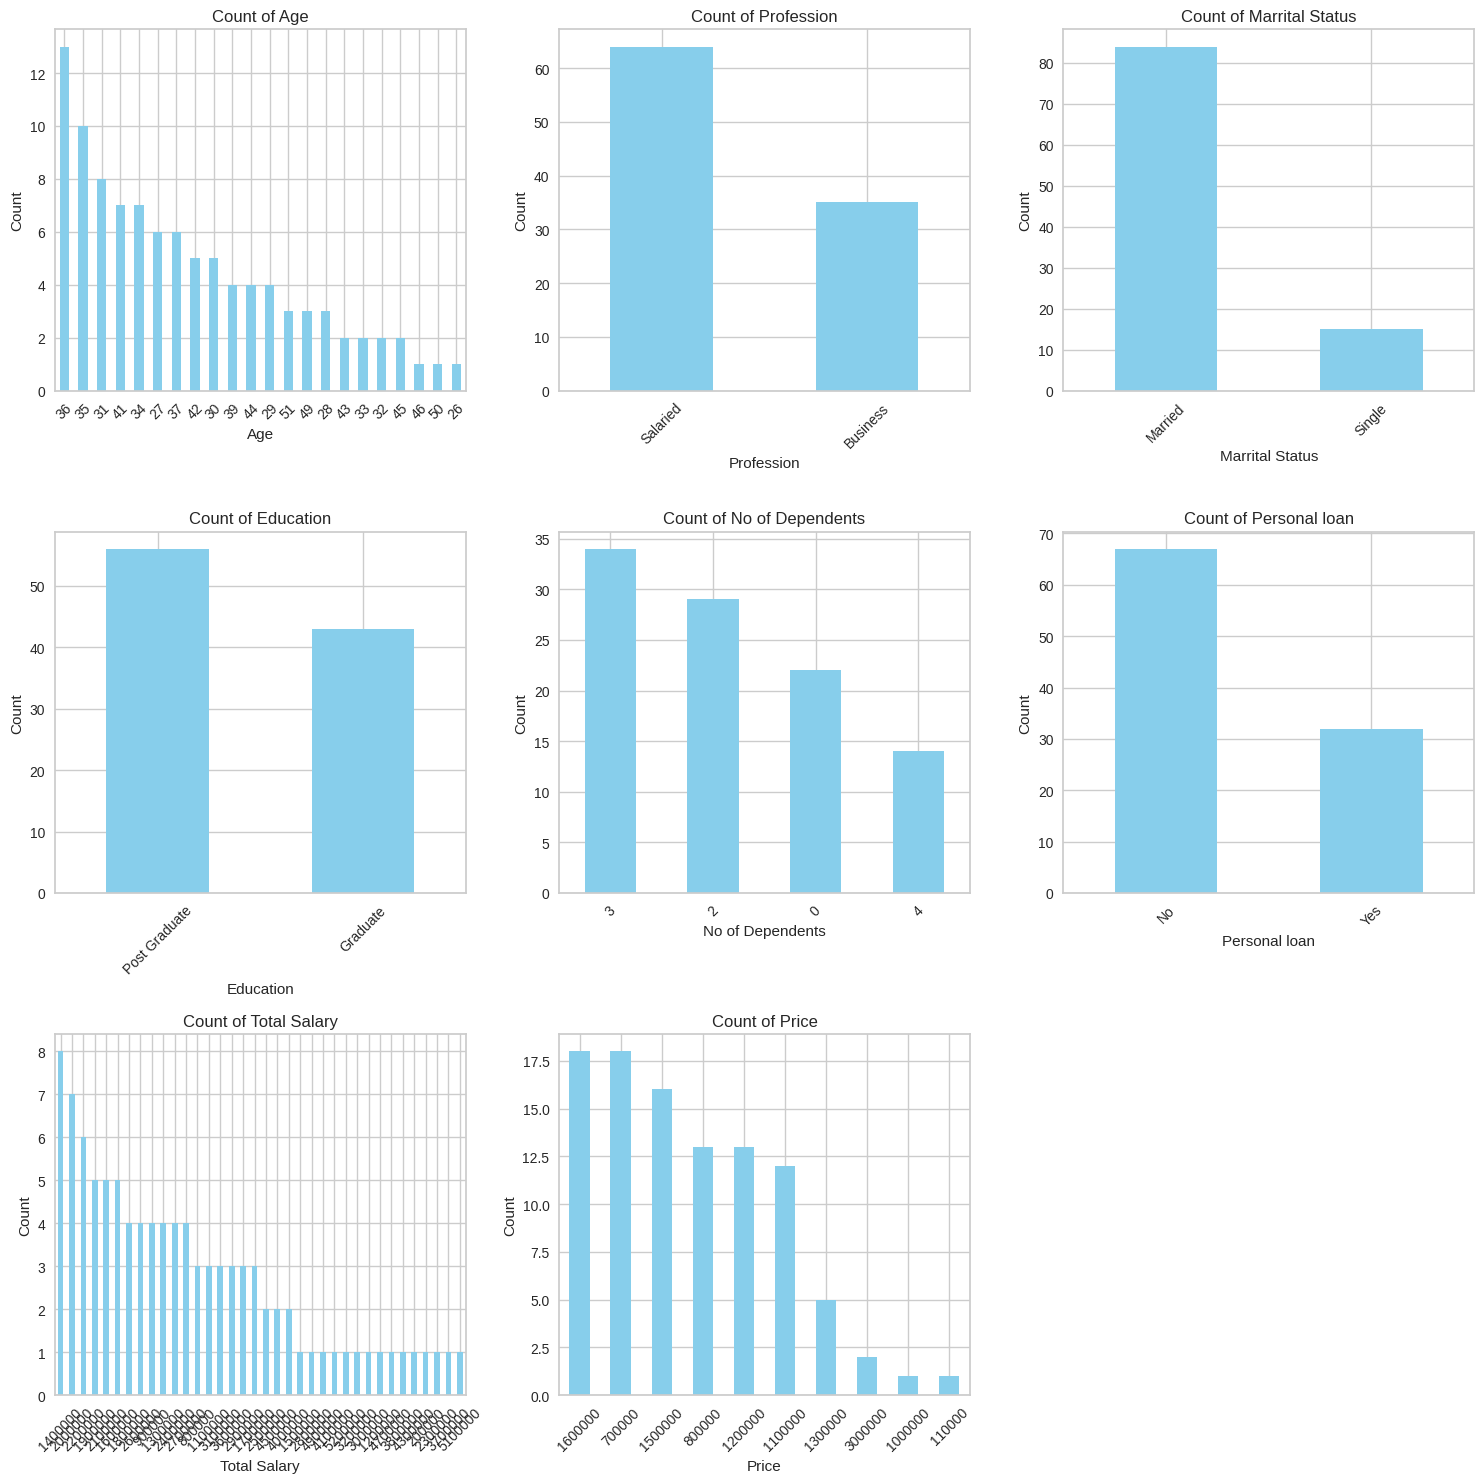

In [16]:
# Calculate number of rows needed
num_rows = (len(variables) + 2) // 3  # Adding 2 to round up if not divisible evenly

# Set the figure size
plt.figure(figsize=(15, 5 * num_rows))

# Iterate over each variable and plot the counts
for i, variable in enumerate(variables):
    if variable in df.columns:
        plt.subplot(num_rows, 3, i + 1)
        df[variable].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f'Count of {variable}')
        plt.xlabel(variable)
        plt.ylabel('Count')
        plt.xticks(rotation=45)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

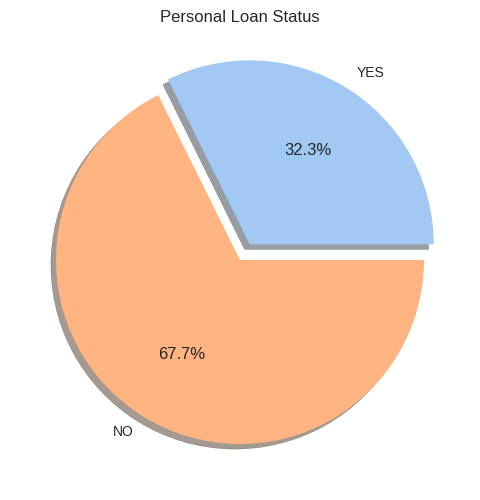

In [17]:
# Defining variables
loan_labels = ['YES', 'NO']
personal_loan_counts = [
    df[df['Personal loan'] == 'Yes']['Personal loan'].count(),
    df[df['Personal loan'] == 'No']['Personal loan'].count()
]

# Declaring exploding pie
explode = [0.1, 0]

# Define Seaborn color palette to use
palette_color = sns.color_palette('pastel')

# Plotting data on chart for Personal Loan
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(personal_loan_counts, labels=loan_labels, colors=palette_color, shadow=True,
        explode=explode, autopct='%1.1f%%')
plt.title('Personal Loan Status')

# Displaying charts
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

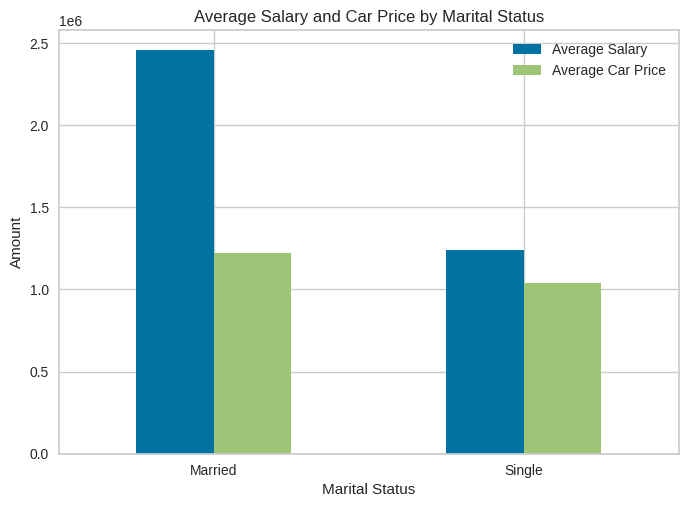

In [21]:
# Group the data by marital status and calculate average salary and average car price for each group
grouped_df = df.groupby('Marrital Status').agg({'Total Salary': 'mean', 'Price': 'mean'})
# Plot the average salary and average car price for each marital status
plt.figure(figsize=(10, 6))
grouped_df.plot(kind='bar')
plt.title('Average Salary and Car Price by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Amount')
plt.legend(['Average Salary', 'Average Car Price'])
plt.xticks(rotation=0)
plt.show()

In [ ]:
from kmodes.kprototypes import KPrototypes

In [29]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [30]:
cluster_features = list(df.columns)
cluster_data = df[cluster_features].values

In [31]:
# Convert  columns to float data type
column_to_convert = [0, 4, 6, 7]
for idx in column_to_convert:
    cluster_data[:, idx] = cluster_data[:, idx].astype(float)

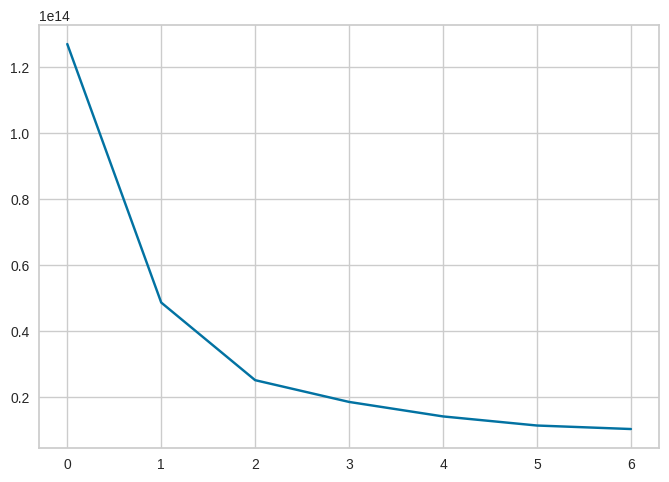

In [32]:
# Finding optimal number of clusters for KPrototypes
cost = []
for num_clusters in list(range(1,8)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(cluster_data, categorical=[1,2,3,5])
    cost.append(kproto.cost_)

plt.plot(cost)

In [33]:
cost

[126979657487180.34,
 48616816198579.65,
 25087753148183.234,
 18491809410726.285,
 14099253855131.873,
 11342834153820.58,
 10279544908376.264]

In [34]:
# fitting data to clusters
kproto = KPrototypes(n_clusters=2, verbose=2,max_iter=20)
clusters = kproto.fit_predict(cluster_data, categorical=[1,2,3,5])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 3, ncost: 49650723166357.79
Run: 1, iteration: 2/20, moves: 4, ncost: 48777842651066.98
Run: 1, iteration: 3/20, moves: 0, ncost: 48777842651066.98
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 4, ncost: 49650723166357.79
Run: 2, iteration: 2/20, moves: 4, ncost: 48777842651066.98
Run: 2, iteration: 3/20, moves: 0, ncost: 48777842651066.98
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/20, moves: 5, ncost: 50528143911238.56
Run: 3, iteration: 2/20, moves: 5, ncost: 48837287201079.53
Run: 3, iteration: 3/20, moves: 1, ncost: 48777842651066.98
Run: 3, iteration: 4/20, moves: 0, ncost: 48777842651066.98
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run:

In [35]:
# Get cluster centroids
cluster_centroids = kproto.cluster_centroids_
print("Cluster Centroids:")
print(cluster_centroids)

Cluster Centroids:
[['40.357142857142854' '2.5714285714285716' '3617857.1428571427'
  '1632142.857142857' 'Salaried' 'Married' 'Post Graduate' 'No']
 ['34.71830985915493' '2.028169014084507' '1739436.61971831'
  '1021267.6056338028' 'Salaried' 'Married' 'Post Graduate' 'No']]


cluster centroids represent the central tendency or mean values of each cluster for both numerical and categorical variables.

<div style="background-color:#DBEDF3; padding:20px; font-size:15px">

|       | **Attribute**       | **Cluster 1**              | **Cluster 2**              |
|-------|---------------------|----------------------------|----------------------------|
| **1** | **Average Age**     | 40.36                      | 34.72                      |
| **2** | **No of Dependents**| 2.57                       | 2.03                       |
| **3** | **Total Salary**    | 3,617,857.14              |      1,739,436.62              |
| **4** | **Price**           | 1,632,142.86              |     1,021,267.61              |
| **5** | **Profession**      | Salaried                   | Salaried                   |
| **6** | **Marrital Status** | Married                    | Married                    |
| **7** | **Education**       | Post Graduate              | Post Graduate              |
| **8** | **Personal loan**   | No                         | No                         |
</div>


In [43]:
df['Cluster'] = clusters

In [44]:
cluster_counts = df['Cluster'].value_counts(normalize=True) * 100
print(cluster_counts)

Cluster
1    71.717172
0    28.282828
Name: proportion, dtype: float64


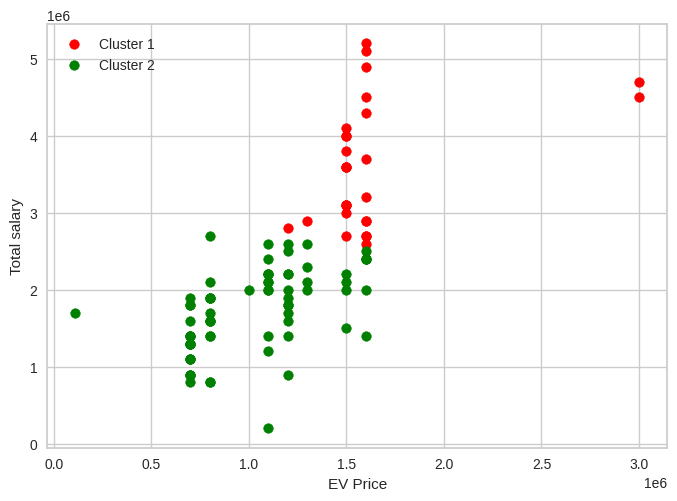

In [79]:
Cluster_0 = df[df.Cluster==0]
Cluster_1 = df[df.Cluster==1]
# plotting the effct of salary and ev price on cluster data

plt.scatter(Cluster_0.Price, Cluster_0['Total Salary'],color='red', marker = 'o', label = 'Cluster 1')
plt.scatter(Cluster_1.Price, Cluster_1['Total Salary'],color='green', label = 'Cluster 2')
plt.legend(loc="upper left")

plt.xlabel('EV Price')
plt.ylabel('Total salary')
plt.show()

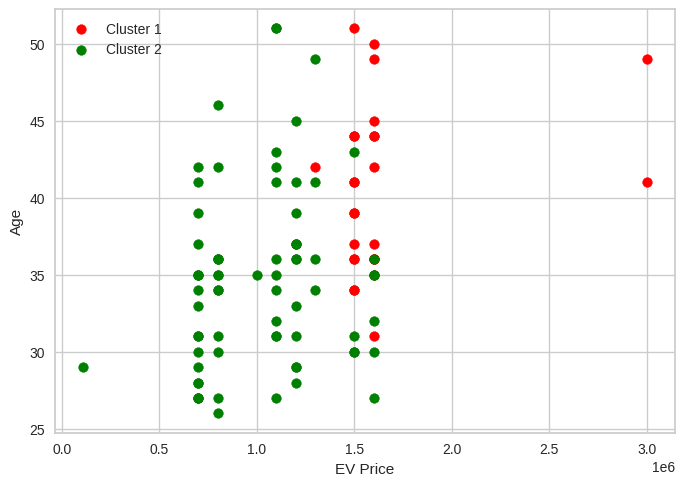

In [86]:
plt.scatter(Cluster_0.Price, Cluster_0['Age'],color='red', marker = 'o', label = 'Cluster 1')
plt.scatter(Cluster_1.Price, Cluster_1['Age'],color='green', label = 'Cluster 2')
plt.legend(loc="upper left")

plt.xlabel('EV Price')
plt.ylabel('Age')
plt.show()

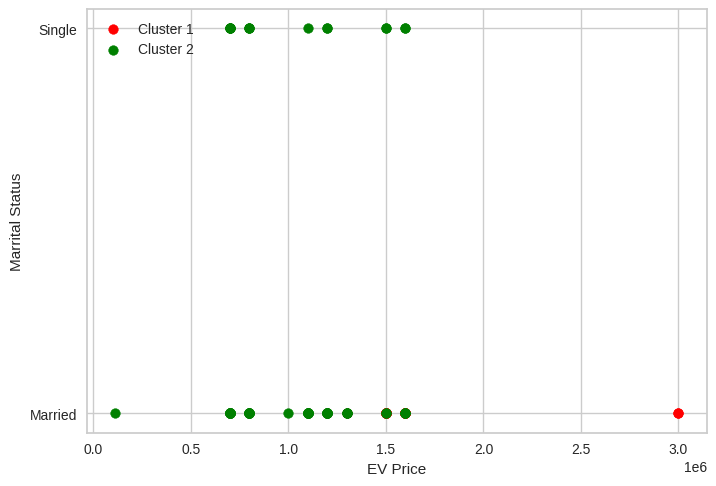

In [85]:
plt.scatter(Cluster_0.Price, Cluster_0['Marrital Status'],color='red', marker = 'o', label = 'Cluster 1')
plt.scatter(Cluster_1.Price, Cluster_1['Marrital Status'],color='green', label = 'Cluster 2')
plt.legend(loc="upper left")

plt.xlabel('EV Price')
plt.ylabel('Marrital Status')
plt.show()

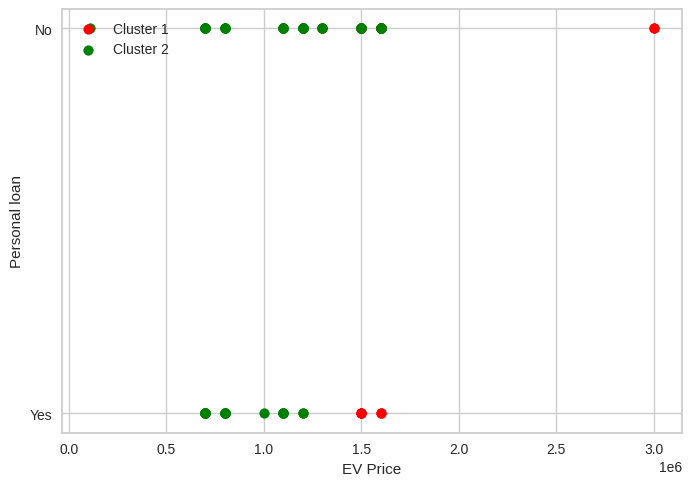

In [83]:
plt.scatter(Cluster_0.Price, Cluster_0['Personal loan'],color='red', marker = 'o', label = 'Cluster 1')
plt.scatter(Cluster_1.Price, Cluster_1['Personal loan'],color='green', label = 'Cluster 2')
plt.legend(loc="upper left")

plt.xlabel('EV Price')
plt.ylabel('Personal loan')
plt.show()

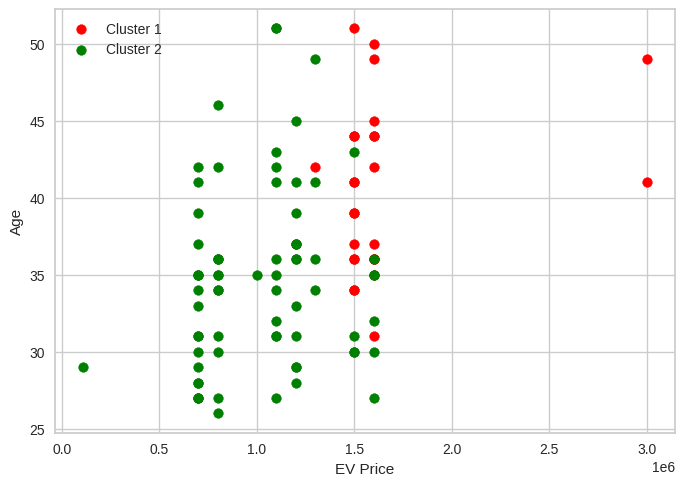

In [81]:
plt.scatter(Cluster_0.Price, Cluster_0['Age'],color='red', marker = 'o', label = 'Cluster 1')
plt.scatter(Cluster_1.Price, Cluster_1['Age'],color='green', label = 'Cluster 2')
plt.legend(loc="upper left")

plt.xlabel('EV Price')
plt.ylabel('Age')
plt.show()

In [46]:
selected_columns = df.columns[df.columns != 'No of Dependents']

# Profile clusters using groupby and describe (excluding 'No of Dependents')
cluster_profiles = df[selected_columns].groupby('Cluster').describe().T
cluster_profiles

Cluster                        0             1
Age          count  2.800000e+01  7.100000e+01
             mean   4.035714e+01  3.471831e+01
             std    5.327874e+00  5.877762e+00
             min    3.100000e+01  2.600000e+01
             25%    3.600000e+01  3.000000e+01
             50%    4.000000e+01  3.500000e+01
             75%    4.400000e+01  3.700000e+01
             max    5.100000e+01  5.100000e+01
Total Salary count  2.800000e+01  7.100000e+01
             mean   3.617857e+06  1.739437e+06
             std    7.990984e+05  5.359848e+05
             min    2.600000e+06  2.000000e+05
             25%    2.900000e+06  1.400000e+06
             50%    3.600000e+06  1.800000e+06
             75%    4.150000e+06  2.100000e+06
             max    5.200000e+06  2.700000e+06
Price        count  2.800000e+01  7.100000e+01
             mean   1.632143e+06  1.021268e+06
             std    3.972625e+05  3.166789e+05
             min    1.200000e+06  1.100000e+05
             25%    1.500000e+06  7.000000e+05
             50%    1.550000e+06  1.100000e+06
             75%    1.600000e+06  1.200000e+06
             max    3.000000e+06  1.600000e+06

In [47]:
# Define the columns to describe (excluding 'Cluster')
columns_to_describe = df.columns[df.columns != 'Cluster']

# Iterate through each variable and calculate descriptive statistics for each cluster
for column in columns_to_describe:
    print("Variable:", column)
    print("Cluster 0:")
    print(df[df['Cluster'] == 0][column].describe().T)
    print("Cluster 1:")
    print(df[df['Cluster'] == 1][column].describe().T)
    print()


Variable: Age
Cluster 0:
count    28.000000
mean     40.357143
std       5.327874
min      31.000000
25%      36.000000
50%      40.000000
75%      44.000000
max      51.000000
Name: Age, dtype: float64
Cluster 1:
count    71.000000
mean     34.718310
std       5.877762
min      26.000000
25%      30.000000
50%      35.000000
75%      37.000000
max      51.000000
Name: Age, dtype: float64

Variable: Profession
Cluster 0:
count           28
unique           2
top       Salaried
freq            23
Name: Profession, dtype: object
Cluster 1:
count           71
unique           2
top       Salaried
freq            41
Name: Profession, dtype: object

Variable: Marrital Status
Cluster 0:
count          28
unique          1
top       Married
freq           28
Name: Marrital Status, dtype: object
Cluster 1:
count          71
unique          2
top       Married
freq           56
Name: Marrital Status, dtype: object

Variable: Education
Cluster 0:
count                28
unique                2
t

### **Cluster 1:**

**Demographic Profile:**

Consists of individuals with an average age of approximately 40.36 years.
Majority of individuals are married.
Most individuals have a post-graduate level of education.
Average number of dependents is approximately 2.57.

**Financial Profile:**

Higher average total salary of around 3,617,857.
Prefers products or services priced around 1,632,142 on average.

**Behavioral Profile:**

Predominantly composed of individuals employed in salaried professions.
Majority of individuals do not have a personal loan.

**Compatibility:**
 Since a majority of individuals in this segment are married, educated, and employed in salaried professions, they may be interested in products or services that cater to their lifestyle and career needs.

**Targeting Strategy:**
Target this segment with premium offerings, tailored financial services, and exclusive deals aimed at enhancing their lifestyle and meeting their financial goals.

### **Cluster 2:**

**Demographic Profile:**

Comprised of individuals with a lower average age of approximately 34.72 years.
Majority of individuals are married.
Most individuals have a post-graduate level of education.
Average number of dependents is approximately 2.03.

**Financial Profile:**

Lower average total salary of approximately 1,739,436.
Prefers products or services priced around 1,021,267. on average.

**Behavioral Profile:**

Predominantly composed of individuals employed in salaried professions.
Majority of individuals do not have a personal loan.

**Compatibility:**
Similar to Segment 1, individuals in this segment are also married, educated, and employed in salaried professions. They may seek value-for-money offerings and financial solutions that help them manage their expenses efficiently.

**Targeting Strategy:**
Target this segment with cost-effective products or services, promotional offers, and financial tools designed to help them save money and achieve their financial objectives.

**Overall, Cluster 1 represents a segment of older individuals with higher earning potential who are willing to spend more on higher-priced items.**

**In contrast, Cluster 2 consists of younger individuals with relatively lower earning potential who are more price-conscious in their purchasing behavior.**

### **Segment Targeting Strategy:**

Prioritize targeting Cluster 1 due to their higher purchasing power, alignment with the company's offerings, and potential for long-term customer relationships.

Simultaneously, consider targeting Cluster 2 to capture a broader market segment and capitalize on potential growth opportunities.

Develop tailored marketing strategies and product/service offerings to address the specific needs and preferences of each segment effectively.

Implement targeted advertising campaigns, personalized promotions, and customer engagement initiatives to maximize reach and conversion within each segment.

<a id="1"></a>
# <p style="padding:15px;background-color:#90EE90;margin:0;color:#FFFFFF;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:500"> Exploring Electric Vehicle Adoption and Infrastructure: Geographic Segmentation Analysis"</p>

In [48]:
Data1=pd.read_csv("/content/drive/MyDrive/EV_INDIA_DATA/EV Stats-1.csv")
Data2=pd.read_csv("/content/drive/MyDrive/EV_INDIA_DATA/CS_Sanctioned.csv")

In [49]:
Data2.rename(columns={'State/UT-wise': 'State'}, inplace=True)

In [50]:
df1 = pd.merge(Data1, Data2, on='State', how='inner')
df1.head()

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state,Number of Electric Vehicle Charging Sanctioned
0,1,Andhra Pradesh,431,692,4689,0,0,3680,0,9492,266
1,2,Assam,463,138,1006,0,117,151,0,1875,20
2,3,Bihar,252,430,2148,6,64,271,0,3171,37
3,4,Chhattisgarh,613,382,2078,58,106,997,0,4234,25
4,5,Delhi,1395,251,5018,0,1,12695,21,19381,72


In [51]:
df1.columns

Index(['Sl. No', 'State',
       'Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules',
       'Two Wheelers (Category L2 (CMVR))',
       'Two Wheelers (Max power not exceeding 250 Watts)',
       'Three Wheelers (Category L5 slow speed as per CMVR)',
       'Three Wheelers (Category L5 as per CMVR)',
       'Passenger Cars (Category M1 as per CMVR)', 'Buses', 'Total in state',
       'Number of Electric Vehicle Charging Sanctioned'],
      dtype='object')

In [52]:
df1.drop(columns=['Sl. No'], inplace=True)

In [53]:
df1 = df1.rename(columns={
    'Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules': 'Two Wheel(L1 & L2)',
    'Two Wheelers (Category L2 (CMVR))': 'Two Wheel(L2 CMVR)',
    'Two Wheelers (Max power not exceeding 250 Watts)': 'Two Wheel(Max power <= 250W)',
    'Three Wheelers (Category L5 slow speed as per CMVR)': 'Three Wheel(L5 Slow)',
    'Three Wheelers (Category L5 as per CMVR)': 'Three Wheel(L5)',
    'Passenger Cars (Category M1 as per CMVR)': 'Passenger Cars (M1)',
    'Total in state': 'Total in State',
    'Number of Electric Vehicle Charging Sanctioned': 'EV Charging Sanctioned'
})


In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   State                         21 non-null     object
 1   Two Wheel(L1 & L2)            21 non-null     int64 
 2   Two Wheel(L2 CMVR)            21 non-null     int64 
 3   Two Wheel(Max power <= 250W)  21 non-null     int64 
 4   Three Wheel(L5 Slow)          21 non-null     int64 
 5   Three Wheel(L5)               21 non-null     int64 
 6   Passenger Cars (M1)           21 non-null     int64 
 7   Buses                         21 non-null     int64 
 8   Total in State                21 non-null     int64 
 9   EV Charging Sanctioned        21 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 1.8+ KB


In [55]:
df1.isnull().sum()

State                           0
Two Wheel(L1 & L2)              0
Two Wheel(L2 CMVR)              0
Two Wheel(Max power <= 250W)    0
Three Wheel(L5 Slow)            0
Three Wheel(L5)                 0
Passenger Cars (M1)             0
Buses                           0
Total in State                  0
EV Charging Sanctioned          0
dtype: int64

In [56]:
df1.describe()

,Two Wheel(L1 & L2),Two Wheel(L2 CMVR),Two Wheel(Max power <= 250W),Three Wheel(L5 Slow),Three Wheel(L5),Passenger Cars (M1),Buses,Total in State,EV Charging Sanctioned
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,1252.619048,635.047619,5073.142857,15.952381,31.666667,4745.952381,1.238095,11755.619048,123.190476
std,1664.431389,682.351118,4605.016409,35.350355,47.215817,5335.663365,4.570610,10371.202339,95.792285
min,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,6.000000,10.000000
25%,431.000000,78.000000,2031.000000,0.000000,0.000000,594.000000,0.000000,3171.000000,37.000000
50%,535.000000,382.000000,3252.000000,1.000000,1.000000,3680.000000,0.000000,9492.000000,131.000000
75%,1451.000000,863.000000,8375.000000,6.000000,64.000000,5729.000000,0.000000,16746.000000,205.000000
max,7182.000000,2355.000000,15199.000000,117.000000,139.000000,19129.000000,21.000000,34013.000000,317.000000



Histograms for numeric columns:


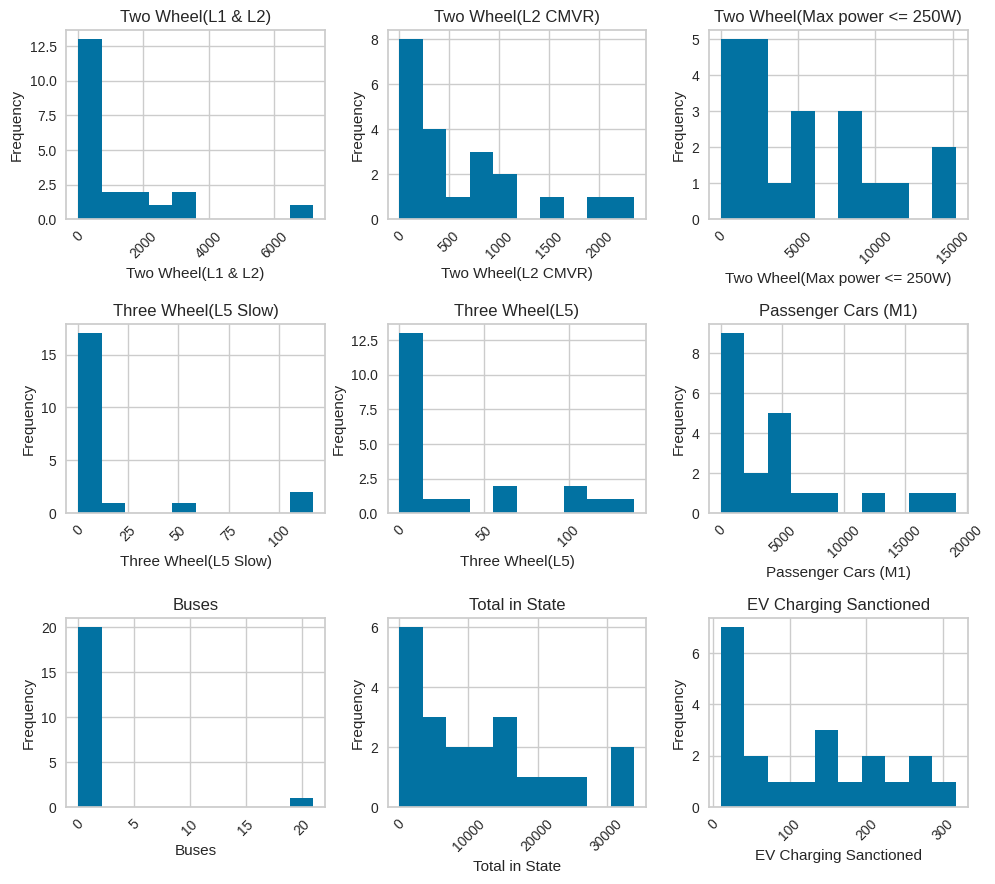

In [57]:
# Bar plots for categorical columns
print("\nHistograms for numeric columns:")
numeric_cols = df1.select_dtypes(include=['int']).columns
num_cols_count = len(numeric_cols)
num_plots_per_row = 3
num_rows = (num_cols_count // num_plots_per_row) + (num_cols_count % num_plots_per_row > 0)

fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(10, 3*num_rows))

for i, col in enumerate(numeric_cols):
    row_idx = i // num_plots_per_row
    col_idx = i % num_plots_per_row
    df1[col].hist(ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(col)
    axes[row_idx, col_idx].set_xlabel(col)
    axes[row_idx, col_idx].set_ylabel('Frequency')
    axes[row_idx, col_idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


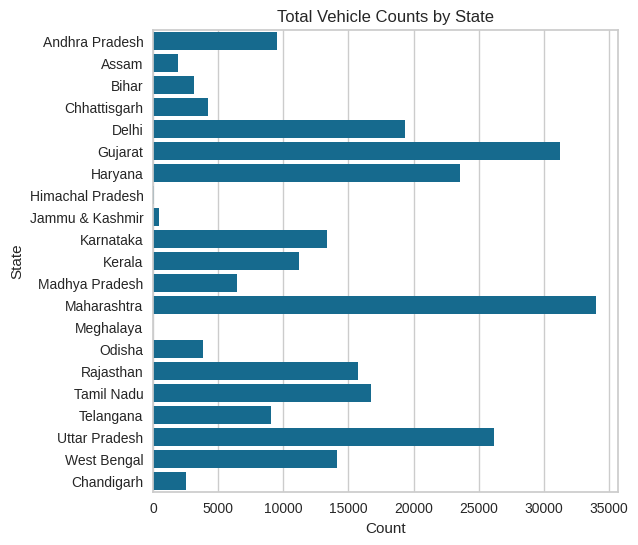

In [58]:
# Analysis 1: Total Vehicle Counts by State (Bar Plot)
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y='State', x='Total in State')
plt.title('Total Vehicle Counts by State')
plt.xlabel('Count')
plt.ylabel('State')
plt.show()

In [59]:
# Selecting the top 10 states based on the total number of vehicles
top_states1 = df1[['State', 'Total in State']].nlargest(10, 'Total in State').reset_index(drop=True)

# Printing the top states without serial number
print("Top 10 States with the Highest Number of Vehicles:\n")
print(top_states1.to_string(index=False))


Top 10 States with the Highest Number of Vehicles:

        State  Total in State
  Maharashtra           34013
      Gujarat           31267
Uttar Pradesh           26209
      Haryana           23589
        Delhi           19381
   Tamil Nadu           16746
    Rajasthan           15763
  West Bengal           14140
    Karnataka           13386
       Kerala           11202


In [60]:
# Selecting the top 10 states based on the total number of vehicles
top_states = df1[['State', 'EV Charging Sanctioned']].nlargest(10, 'EV Charging Sanctioned').reset_index(drop=True)

# Printing the top states without serial number
print("Top 10 States with the Highest EV Charging stations Sanctioned:\n")
print(top_states.to_string(index=False))


Top 10 States with the Highest EV Charging stations Sanctioned:

         State  EV Charging Sanctioned
   Maharashtra                     317
Andhra Pradesh                     266
    Tamil Nadu                     256
       Gujarat                     228
 Uttar Pradesh                     207
     Rajasthan                     205
     Karnataka                     172
Madhya Pradesh                     159
   West Bengal                     141
     Telangana                     138


<Figure size 1600x1000 with 0 Axes>

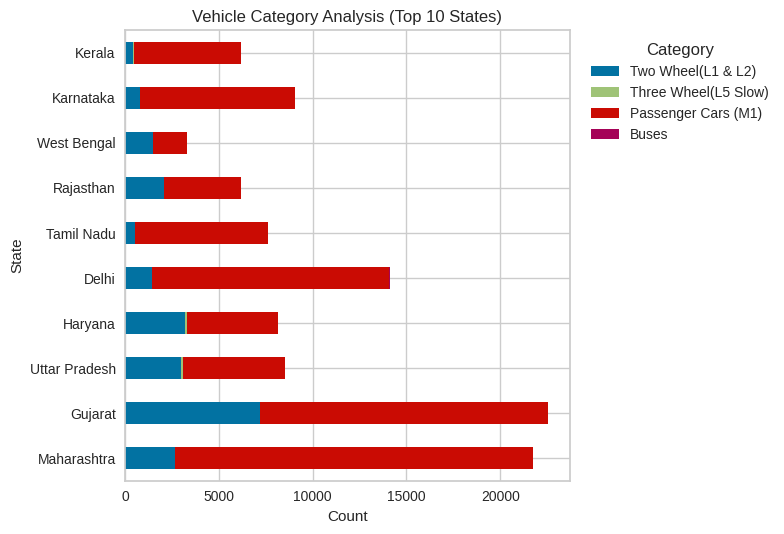

In [61]:
#  Vehicle Category Analysis (Horizontal Bar Plot)
top_10_states = df1.nlargest(10, 'Total in State')

df_category = top_10_states[['State', 'Two Wheel(L1 & L2)',
                             'Three Wheel(L5 Slow)',
                             'Passenger Cars (M1)', 'Buses']]

plt.figure(figsize=(16, 10))
df_category.set_index('State').plot(kind='barh', stacked=True)
plt.title('Vehicle Category Analysis (Top 10 States)')
plt.xlabel('Count')
plt.ylabel('State')
plt.legend(title='Category', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.subplots_adjust(left=0.25, right=0.8)  # Adjust the left and right margins
plt.tight_layout()  # Automatically adjust the subplot parameters to avoid overlap
plt.show()

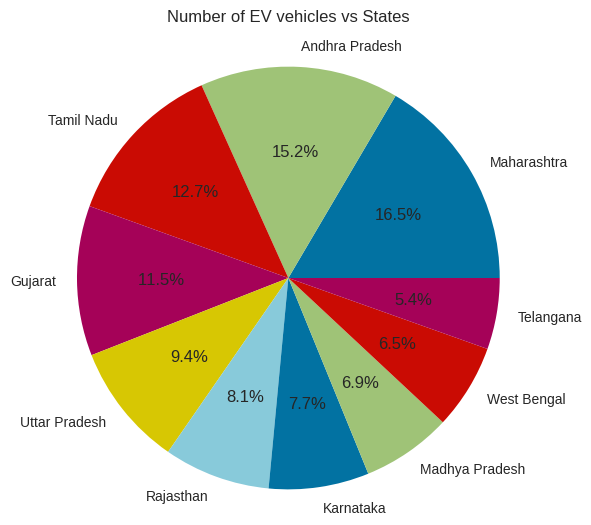

In [62]:
# Plotting
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed
plt.title("Number of EV vehicles vs States\n")
plt.pie(top_states1["Total in State"], labels=top_states["State"], autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

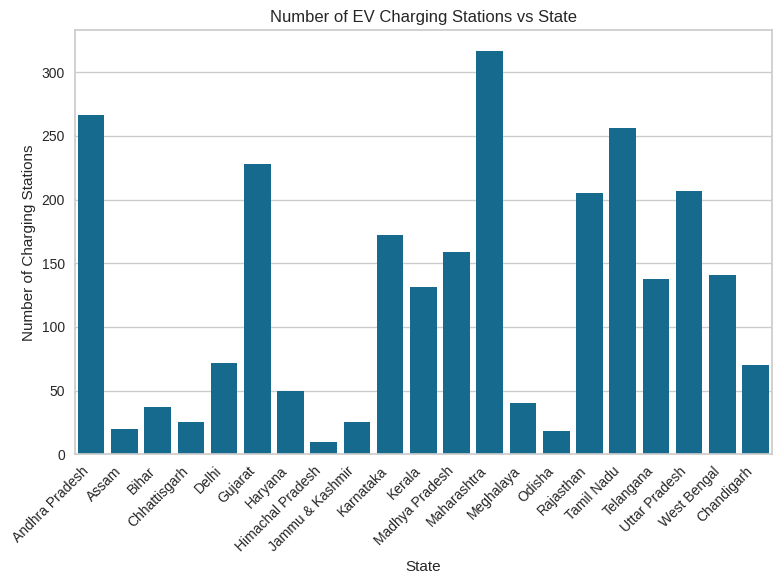

In [63]:
# Plotting the number of EV charging stations vs state
plt.figure(figsize=(8, 6))
sns.barplot(data=df1, x='State', y='EV Charging Sanctioned')
plt.title('Number of EV Charging Stations vs State')
plt.xlabel('State')
plt.ylabel('Number of Charging Stations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   State                         21 non-null     object
 1   Two Wheel(L1 & L2)            21 non-null     int64 
 2   Two Wheel(L2 CMVR)            21 non-null     int64 
 3   Two Wheel(Max power <= 250W)  21 non-null     int64 
 4   Three Wheel(L5 Slow)          21 non-null     int64 
 5   Three Wheel(L5)               21 non-null     int64 
 6   Passenger Cars (M1)           21 non-null     int64 
 7   Buses                         21 non-null     int64 
 8   Total in State                21 non-null     int64 
 9   EV Charging Sanctioned        21 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 1.8+ KB


In [65]:
# Extracting the numerical features for clustering
X = df1[['Two Wheel(L1 & L2)', 'Two Wheel(L2 CMVR)', 'Two Wheel(Max power <= 250W)',
        'Three Wheel(L5 Slow)', 'Three Wheel(L5)', 'Passenger Cars (M1)',
        'Buses', 'Total in State', 'EV Charging Sanctioned']]

# Standardize the features by scaling them
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

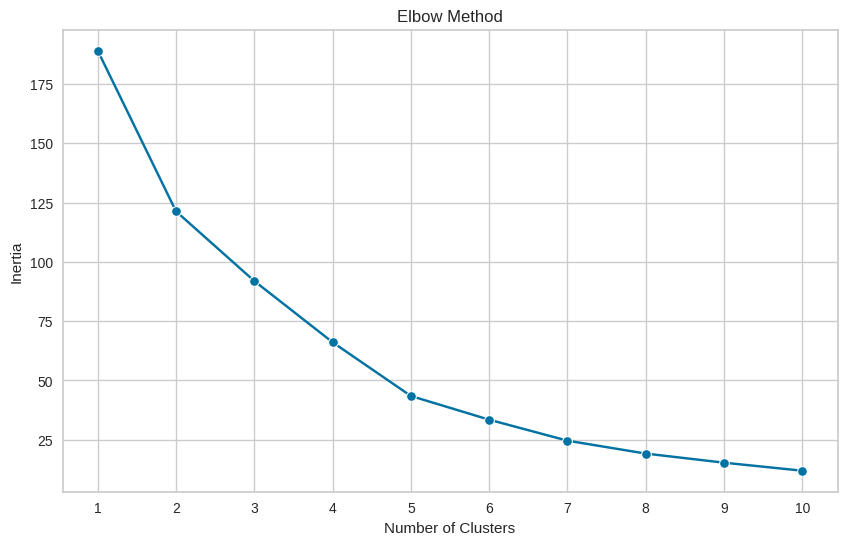

In [66]:
# Calculate inertia values for different numbers of clusters
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 11), y=inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [67]:
# Fit KMeans clustering with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42, algorithm='lloyd')
kmeans.fit(X_scaled)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to the original dataframe
df1['Cluster'] = cluster_labels

# Display the number of data points in each cluster
print("Number of data points in each cluster:")
print(df1['Cluster'].value_counts())


Number of data points in each cluster:
Cluster
2    9
1    7
4    2
0    2
3    1
Name: count, dtype: int64


In [68]:
# Get the centroids of each cluster
centroids = kmeans.cluster_centers_

# Display the centroids
print("Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}: {centroid}")

Centroids:
Cluster 0: [ 1.11146965  1.94389508  2.10954195  2.87107744  1.08150139  0.07980443
 -0.27757128  1.29859175  0.05679625]
Cluster 1: [-0.22940021  0.04733969  0.22448801 -0.35060273 -0.48882003  0.08360421
 -0.18148892  0.10548755  0.68257381]
Cluster 2: [-0.57812761 -0.57889818 -0.85158016 -0.23051439  0.34964928 -0.78637829
 -0.27757128 -0.91287048 -0.83759617]
Cluster 3: [ 0.0876558  -0.57672904 -0.01227023 -0.46240911 -0.66553932  1.52658618
  4.43046471  0.75340255 -0.5475872 ]
Cluster 4: [ 2.24917741  0.78382232  0.94299585 -0.37544859 -0.6112834   2.40299004
 -0.05337909  2.06341769  1.59717177]


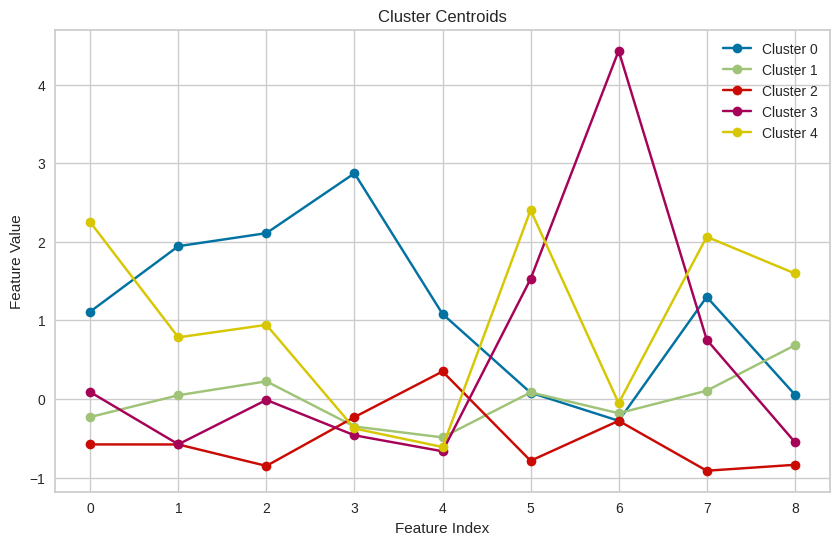

In [69]:
# Plot centroids
plt.figure(figsize=(10, 6))
plt.title('Cluster Centroids')
plt.xlabel('Feature Index')
plt.ylabel('Feature Value')
for i, centroid in enumerate(centroids):
    plt.plot(centroid, label=f'Cluster {i}', marker='o')
plt.legend()
plt.grid(True)
plt.show()



In [70]:
# Interpretation
for i, centroid in enumerate(centroids):
    print(f"Cluster {i} Centroid:")
    for j, value in enumerate(centroid):
        print(f"Feature {j}: {value}")
    print()

Cluster 0 Centroid:
Feature 0: 1.1114696501568768
Feature 1: 1.9438950820747416
Feature 2: 2.1095419485037494
Feature 3: 2.8710774405900357
Feature 4: 1.0815013916622873
Feature 5: 0.07980443483370223
Feature 6: -0.27757128307363466
Feature 7: 1.2985917458807537
Feature 8: 0.05679625342536684

Cluster 1 Centroid:
Feature 0: -0.2294002060632913
Feature 1: 0.04733969298778597
Feature 2: 0.2244880051284005
Feature 3: -0.3506027259182063
Feature 4: -0.488820027000728
Feature 5: 0.08360421053683675
Feature 6: -0.18148891585583804
Feature 7: 0.1054875549684338
Feature 8: 0.6825738079819871

Cluster 2 Centroid:
Feature 0: -0.5781276077065123
Feature 1: -0.5788981792051204
Feature 2: -0.8515801551413315
Feature 3: -0.2305143906627576
Feature 4: 0.3496492793557003
Feature 5: -0.7863782900811886
Feature 6: -0.27757128307363466
Feature 7: -0.9128704781400753
Feature 8: -0.837596167854513

Cluster 3 Centroid:
Feature 0: 0.08765579758840135
Feature 1: -0.576729039194099
Feature 2: -0.01227023080990

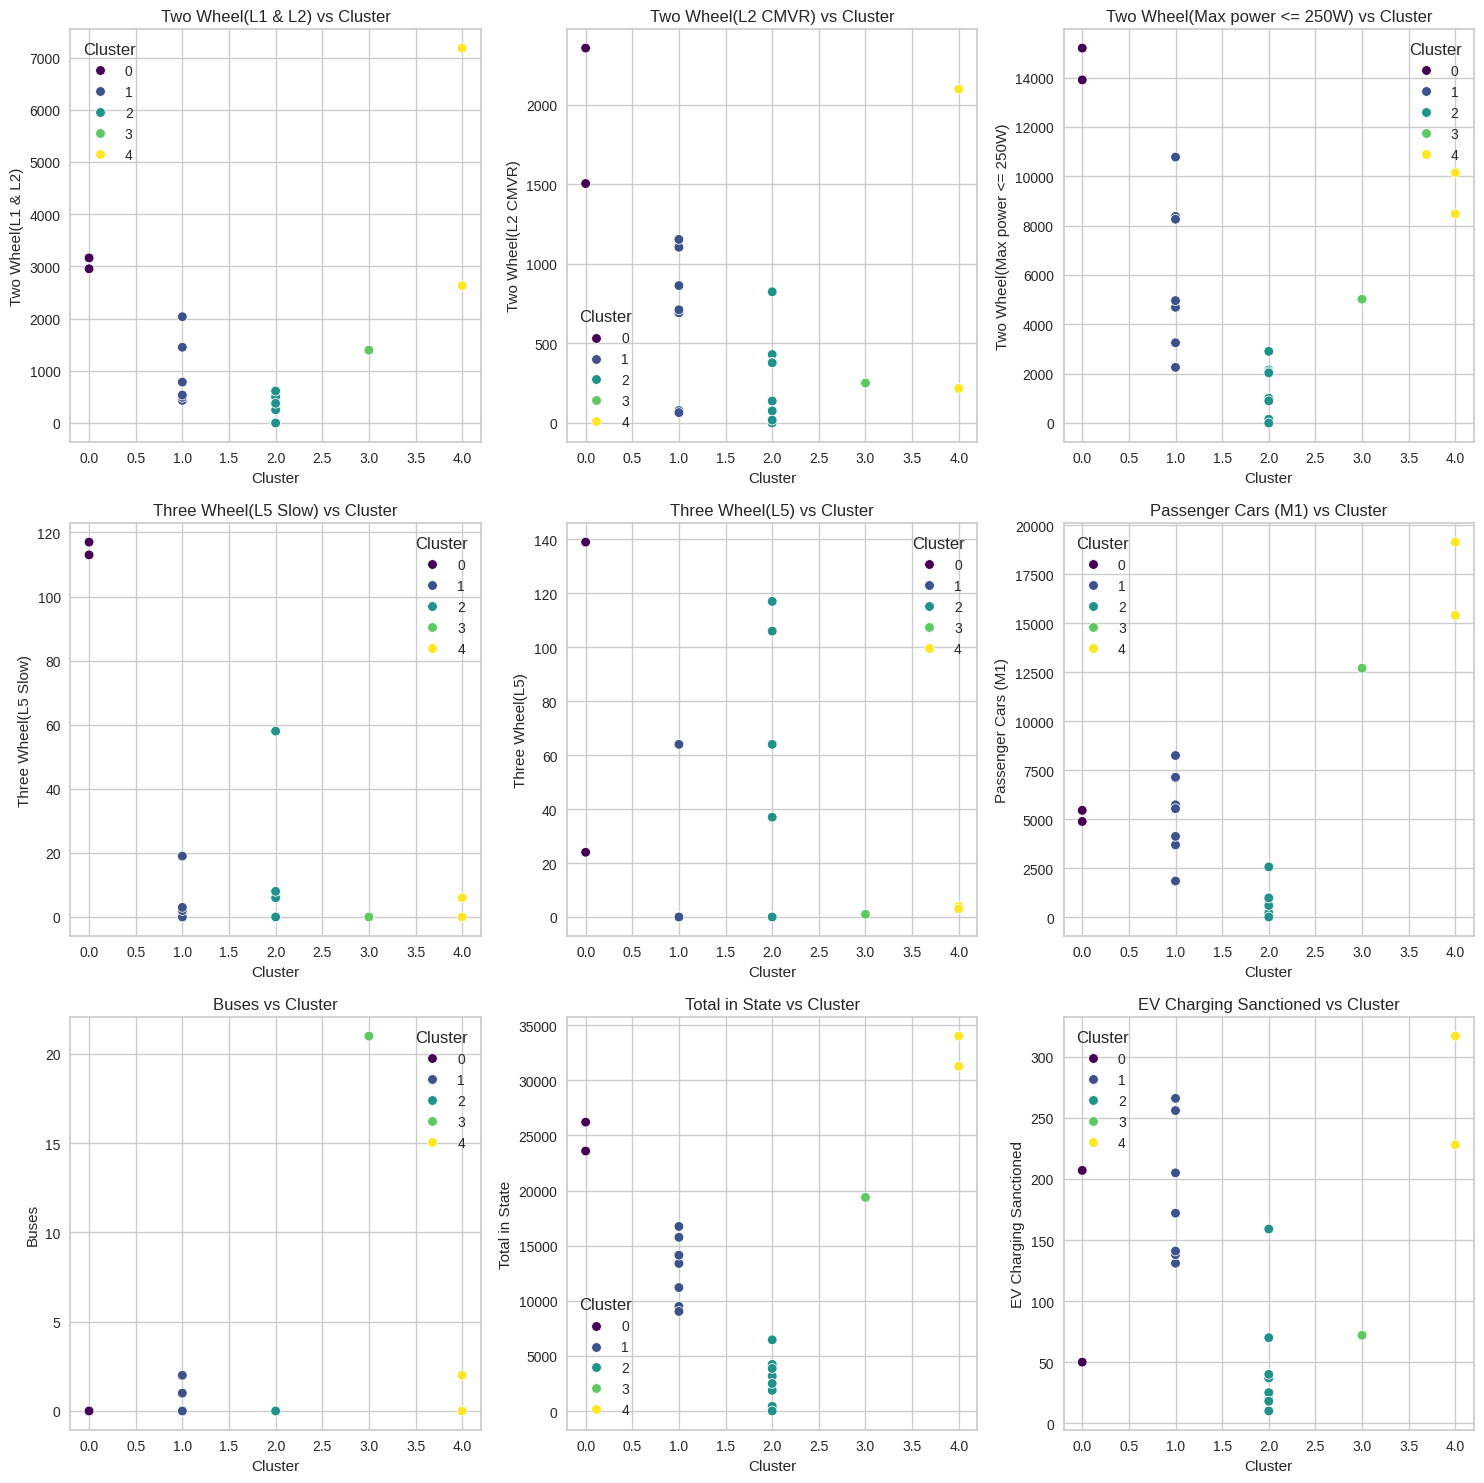

In [71]:
# Define the features to visualize
features = ['Two Wheel(L1 & L2)', 'Two Wheel(L2 CMVR)', 'Two Wheel(Max power <= 250W)',
            'Three Wheel(L5 Slow)', 'Three Wheel(L5)', 'Passenger Cars (M1)',
            'Buses', 'Total in State', 'EV Charging Sanctioned']

# Calculate the number of rows needed for subplots
num_rows = (len(features) + 2) // 3  # Adding 2 to account for the ceiling division and the last row

# Create subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature against the cluster assignments
for i, feature in enumerate(features):
    sns.scatterplot(data=df1, x='Cluster', y=feature, hue='Cluster', palette='viridis', ax=axes[i])
    axes[i].set_title(f'{feature} vs Cluster')
    axes[i].set_ylabel(feature)
    axes[i].set_xlabel('Cluster')
    axes[i].legend(title='Cluster')
    axes[i].grid(True)

# Hide empty subplots
for j in range(len(features), num_rows*3):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [72]:
X['Cluster'] = cluster_labels
# Group data by cluster and calculate mean/median/std of each feature
cluster_profiles = X.groupby('Cluster').agg(['mean', 'median', 'std'])

# Print cluster profiles
cluster_profiles.T


<ipython-input-72-cf8cf68b28e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = cluster_labels


Cluster                                         0             1            2  \
Two Wheel(L1 & L2)           mean     3058.000000    880.000000   313.555556   
                             median   3058.000000    535.000000   377.000000   
                             std       147.078210    625.065863   259.440316   
Two Wheel(L2 CMVR)           mean     1929.500000    666.571429   249.555556   
                             median   1929.500000    711.000000   138.000000   
                             std       601.747871    442.994679   277.787289   
Two Wheel(Max power <= 250W) mean    14553.500000   6082.000000  1246.111111   
                             median  14553.500000   4961.000000  1006.000000   
                             std       912.874855   3107.153038  1081.259965   
Three Wheel(L5 Slow)         mean      115.000000      3.857143     8.000000   
                             median    115.000000      2.000000     0.000000   
                             std         2.828427      6.768273    19.000000   
Three Wheel(L5)              mean       81.500000      9.142857    47.777778   
                             median     81.500000      0.000000    37.000000   
                             std        81.317280     24.189726    51.334145   
Passenger Cars (M1)          mean     5161.500000   5181.285714   651.222222   
                             median   5161.500000   5530.000000   271.000000   
                             std       400.929545   2165.938343   805.581898   
Buses                        mean        0.000000      0.428571     0.000000   
                             median      0.000000      0.000000     0.000000   
                             std         0.000000      0.786796     0.000000   
Total in State               mean    24899.000000  12823.285714  2516.222222   
                             median  24899.000000  13386.000000  2500.000000   
                             std      1852.619767   3004.571778  2168.929101   
EV Charging Sanctioned       mean      128.500000    187.000000    44.888889   
                             median    128.500000    172.000000    25.000000   
                             std       111.015765     56.574435    46.218082   

Cluster                                    3             4  
Two Wheel(L1 & L2)           mean     1395.0   4906.000000  
                             median   1395.0   4906.000000  
                             std         NaN   3218.750068  
Two Wheel(L2 CMVR)           mean      251.0   1157.000000  
                             median    251.0   1157.000000  
                             std         NaN   1329.360749  
Two Wheel(Max power <= 250W) mean     5018.0   9311.000000  
                             median   5018.0   9311.000000  
                             std         NaN   1180.868325  
Three Wheel(L5 Slow)         mean        0.0      3.000000  
                             median      0.0      3.000000  
                             std         NaN      4.242641  
Three Wheel(L5)              mean        1.0      3.500000  
                             median      1.0      3.500000  
                             std         NaN      0.707107  
Passenger Cars (M1)          mean    12695.0  17258.500000  
                             median  12695.0  17258.500000  
                             std         NaN   2645.286468  
Buses                        mean       21.0      1.000000  
                             median     21.0      1.000000  
                             std         NaN      1.414214  
Total in State               mean    19381.0  32640.000000  
                             median  19381.0  32640.000000  
                             std         NaN   1941.715221  
EV Charging Sanctioned       mean       72.0    272.500000  
                             median     72.0    272.500000  
                             std         NaN     62.932504

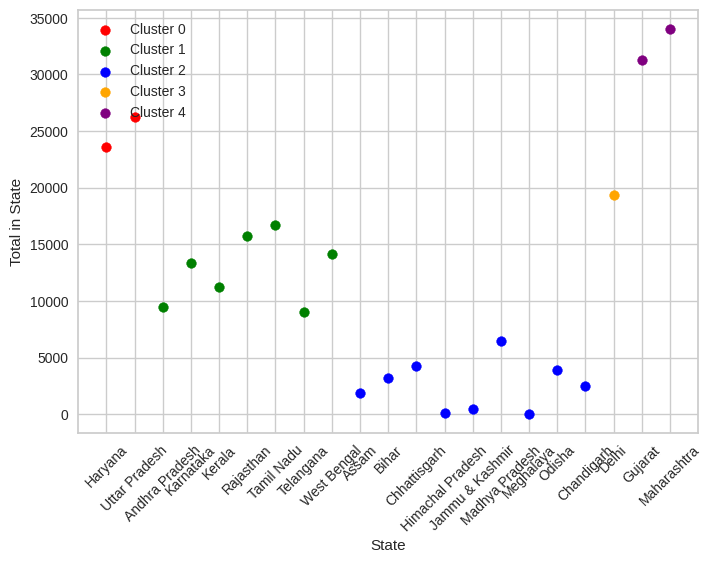

In [73]:
# Extracting data for each cluster
Cluster_0 = df1[df1['Cluster'] == 0]
Cluster_1 = df1[df1['Cluster'] == 1]
Cluster_2 = df1[df1['Cluster'] == 2]
Cluster_3 = df1[df1['Cluster'] == 3]
Cluster_4 = df1[df1['Cluster'] == 4]

# Plotting the effect of State and Total in State on cluster data
plt.scatter(Cluster_0['State'], Cluster_0['Total in State'], color='red', marker='o', label='Cluster 0')
plt.scatter(Cluster_1['State'], Cluster_1['Total in State'], color='green', marker='o', label='Cluster 1')
plt.scatter(Cluster_2['State'], Cluster_2['Total in State'], color='blue', marker='o', label='Cluster 2')
plt.scatter(Cluster_3['State'], Cluster_3['Total in State'], color='orange', marker='o', label='Cluster 3')
plt.scatter(Cluster_4['State'], Cluster_4['Total in State'], color='purple', marker='o', label='Cluster 4')

plt.legend(loc="upper left")
plt.xlabel('State')
plt.ylabel('Total in State')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


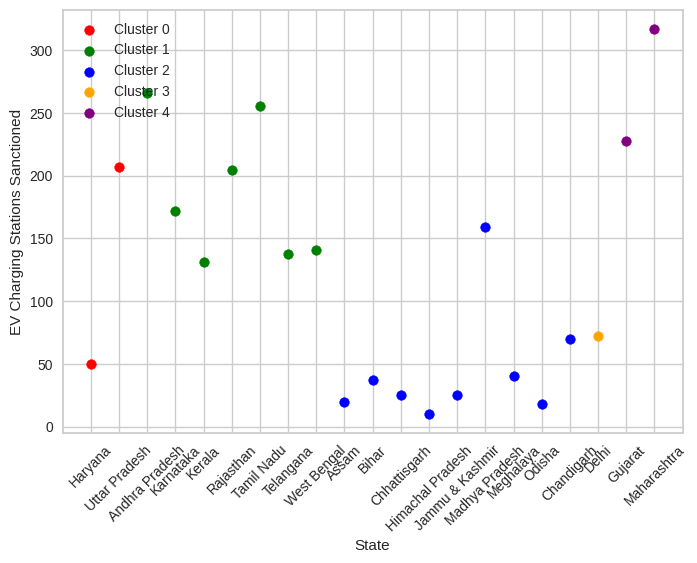

In [74]:
# Extracting data for each cluster
Cluster_0 = df1[df1['Cluster'] == 0]
Cluster_1 = df1[df1['Cluster'] == 1]
Cluster_2 = df1[df1['Cluster'] == 2]
Cluster_3 = df1[df1['Cluster'] == 3]
Cluster_4 = df1[df1['Cluster'] == 4]

# Plotting the effect of State and Total in State on cluster data
plt.scatter(Cluster_0['State'], Cluster_0['EV Charging Sanctioned'], color='red', marker='o', label='Cluster 0')
plt.scatter(Cluster_1['State'], Cluster_1['EV Charging Sanctioned'], color='green', marker='o', label='Cluster 1')
plt.scatter(Cluster_2['State'], Cluster_2['EV Charging Sanctioned'], color='blue', marker='o', label='Cluster 2')
plt.scatter(Cluster_3['State'], Cluster_3['EV Charging Sanctioned'], color='orange', marker='o', label='Cluster 3')
plt.scatter(Cluster_4['State'], Cluster_4['EV Charging Sanctioned'], color='purple', marker='o', label='Cluster 4')

plt.legend(loc="upper left")
plt.xlabel('State')
plt.ylabel('EV Charging Stations Sanctioned')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


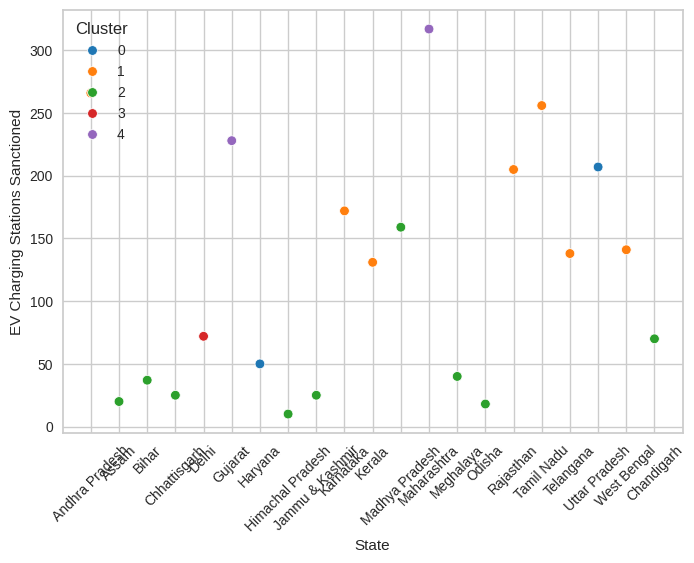

In [75]:
sns.scatterplot(data=df1, x='State', y='EV Charging Sanctioned', hue='Cluster', palette='tab10')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Cluster', loc='upper left')
plt.xlabel('State')
plt.ylabel('EV Charging Stations Sanctioned')
plt.show()

In [76]:
# Define the columns to describe (excluding 'Cluster')
columns_to_describe = df1.columns[df1.columns != 'Cluster']

# Iterate through each variable and calculate descriptive statistics for each cluster
for column in columns_to_describe:
    print("Variable:", column)
    for cluster_label in range(5):  # Replace `num_clusters` with the actual number of clusters
        print(f"Cluster {cluster_label}:")
        print(df1[df1['Cluster'] == cluster_label][column].describe().T)
    print()


Variable: State
Cluster 0:
count           2
unique          2
top       Haryana
freq            1
Name: State, dtype: object
Cluster 1:
count                  7
unique                 7
top       Andhra Pradesh
freq                   1
Name: State, dtype: object
Cluster 2:
count         9
unique        9
top       Assam
freq          1
Name: State, dtype: object
Cluster 3:
count         1
unique        1
top       Delhi
freq          1
Name: State, dtype: object
Cluster 4:
count           2
unique          2
top       Gujarat
freq            1
Name: State, dtype: object

Variable: Two Wheel(L1 & L2)
Cluster 0:
count       2.00000
mean     3058.00000
std       147.07821
min      2954.00000
25%      3006.00000
50%      3058.00000
75%      3110.00000
max      3162.00000
Name: Two Wheel(L1 & L2), dtype: float64
Cluster 1:
count       7.000000
mean      880.000000
std       625.065863
min       431.000000
25%       461.500000
50%       535.000000
75%      1117.500000
max      2036.000000
N

### **Cluster 0:**

This cluster shows moderate to low registrations across various vehicle types and EV charging sanctioned. While it may not be the most attractive segment due to its lower registration numbers compared to some other clusters, it still presents opportunities for targeted offerings tailored to the specific needs of this segment.

### **Cluster 1:**

With moderate registrations across different vehicle types and EV charging sanctioned, Cluster 1 represents a segment with potential for targeted offerings. While not the highest in terms of registrations, this cluster's moderate size and diverse vehicle preferences make it an attractive target for tailored marketing strategies.

### **Cluster 2:**

Cluster 2 exhibits lower registrations across most vehicle types and EV charging sanctioned. Despite this, it may still be a viable segment for targeted offerings, especially if the company can identify and address the specific needs and preferences of customers within this cluster. Tailored marketing efforts and product/service customization could help maximize the potential of this segment.

### **Cluster 3:**
This cluster shows relatively low registrations across various vehicle types and EV charging sanctioned, except for buses, where it has the highest count. While not as large as some other clusters, Cluster 3 might still be an attractive segment for offerings targeting the bus transportation sector. Targeted marketing and specialized solutions for bus operators could be effective strategies for this cluster.

### **Cluster 4:**

Cluster 4 appears to be an attractive segment due to higher registrations across various vehicle types and EV charging sanctioned. With its significant presence in the market and diverse preferences, this cluster presents opportunities for offerings targeting a broad range of vehicles and EV charging infrastructure. Tailored marketing strategies aimed at this segment's preferences could yield favorable results for the company.

In conclusion, the combined geographical and behavioral analyses offer valuable insights into the electric vehicle (EV) market:

*Geographical Analysis:*
The distribution of EV usage across different regions reveals varying patterns. States like Gujarat and Andhra Pradesh exhibit a significant presence of EVs, with diverse vehicle types and infrastructure support. In contrast, regions like Assam show lower EV adoption rates and infrastructure development.

*Behavioral Analysis:*
 Understanding consumer behavior provides crucial insights for marketing strategies. Customers with higher total salaries tend to opt for higher-priced EVs, indicating a preference for premium offerings. Conversely, those with lower salaries may prioritize affordability, opting for more budget-friendly options.
